In [1]:
import json
import requests
import os
import dotenv

dotenv = dotenv.load_dotenv()

In [18]:
url = "https://54285744-illusion-diffusion.gateway.alpha.fal.ai/"

payload = {
    "image_url": "https://github.com/BenyaminZojaji/PyDeploy-Course/blob/main/Assignment02/pattern.png?raw=true",
    "prompt": "(masterpiece:1.4), (best quality), (detailed), simple blue poppy flower realistic and natural",
    "negative_prompt": "(worst quality, poor details:1.4), lowres, (artist name, signature, watermark:1.4), bad-artist-anime, bad_prompt_version2, bad-hands-5, ng_deepnegative_v1_75t"
}
Fal_API_KEY = os.getenv("Fal_API_KEY")
headers = {
    "Authorization": Fal_API_KEY,
    "Content-Type": "application/json"
}
response = requests.post(url, json=payload, headers=headers)
response.status_code

200

In [ ]:
img_link = response.json()['image']['url']
res = requests.get(img_link, allow_redirects=True)
open('generated_image.png', 'wb').write(res.content)

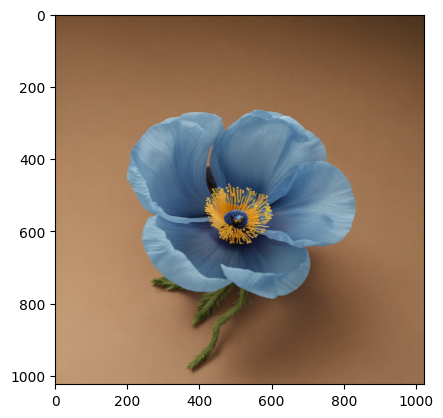

In [20]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('generated_image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [22]:
url = "https://my-api.plantnet.org/v2/identify/all"

PlantNet_API_KEY = os.getenv("PlantNet_API_KEY")
payload = {
    "api-key": PlantNet_API_KEY
}

headers = {
}
file = 'generated_image.png'
files = {
    'images': open(f'{file}','rb')
}

response = requests.post(url, params=payload, headers=headers, files=files)
print(response.status_code)

200


In [37]:
response.json()['results'][0]['species']['commonNames'][0]

'Thorny satin poppy'